<a href="https://colab.research.google.com/github/YuvanShankar2006/Titanic_survival_prediction/blob/main/Titanic_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTING PACKAGES**

In [274]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import accuracy_score
import seaborn as sns

##Feeding the data

In [275]:
df=pd.read_csv('/Titanic-Dataset.csv')

##Getting insights from Data

In [276]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [278]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [279]:
handling_missing_values=df.isnull().sum()
print(handling_missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [280]:
df[['Age']]
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


#Exploratory Data Analysis

##Handling missing values

In [281]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Cabin'].fillna(df['Cabin'].mode()[0], inplace=True)
df.isnull().sum()
print("Missing values Handled !")

Missing values Handled !


<ipython-input-281-3a09114a4697>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
<ipython-input-281-3a09114a4697>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

##Categorical data into Numerical Data

In [282]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked']=df['Embarked'].map({'S':0,'C':1,'Q':2})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,B96 B98,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,B96 B98,0


In [283]:

for i in df['Cabin'].unique():
  if(i[0]=='A'):
    df['Cabin']=df['Cabin'].replace(i,'1')
  elif(i[0]=='B'):
    df['Cabin']=df['Cabin'].replace(i,'2')
  elif(i[0]=='C'):
    df['Cabin']=df['Cabin'].replace(i,'3')
  elif(i[0]=='D'):
    df['Cabin']=df['Cabin'].replace(i,'4')
  elif(i[0]=='E'):
    df['Cabin']=df['Cabin'].replace(i,'5')
  elif(i[0]=='F'):
    df['Cabin']=df['Cabin'].replace(i,'6')
  elif(i[0]=='G'):
    df['Cabin']=df['Cabin'].replace(i,'7')
  elif(i[0]=='T'):
    df['Cabin']=df['Cabin'].replace(i,'8')
df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,3,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,3,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,2,0


##Dropping unwanted columns

In [284]:
df = df.drop(['Name', 'Ticket'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,0,22.0,1,0,7.2500,2,0
1,2,1,1,1,38.0,1,0,71.2833,3,1
2,3,1,3,1,26.0,0,0,7.9250,2,0
3,4,1,1,1,35.0,1,0,53.1000,3,0
4,5,0,3,0,35.0,0,0,8.0500,2,0


#Training The Model

##Splitting The Dataset

In [285]:
y=df[['Survived']]
x=df.drop('Survived',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

##Model Selection and Training

In [286]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(y_pred)

[[ 0.93955602]
 [ 0.72004458]
 [ 0.10454108]
 [ 0.62166028]
 [ 0.19038941]
 [ 0.54940191]
 [ 0.09561402]
 [ 0.3317674 ]
 [ 0.96777506]
 [ 0.44744731]
 [ 1.06084124]
 [ 0.12988515]
 [ 0.18102403]
 [ 0.4809509 ]
 [ 0.57648794]
 [ 0.16761061]
 [ 0.99193391]
 [ 0.49545718]
 [ 0.35990882]
 [ 0.13691574]
 [ 0.08562029]
 [ 0.99774411]
 [ 0.14910565]
 [ 0.63331265]
 [ 0.09303244]
 [ 0.08485496]
 [ 0.68411884]
 [ 0.06112018]
 [ 0.05055908]
 [ 0.21754556]
 [-0.26136116]
 [ 0.71429305]
 [ 0.46003427]
 [ 0.24202393]
 [ 0.96543894]
 [ 0.06923183]
 [ 0.84168426]
 [ 0.9180769 ]
 [ 0.65352531]
 [ 0.08098322]
 [ 0.60085611]
 [ 0.98310765]
 [ 0.13298061]
 [ 0.1776908 ]
 [-0.26175077]
 [ 0.61840213]
 [ 0.13495175]
 [ 1.04744294]
 [ 0.16665549]
 [ 0.87823036]
 [ 0.15969467]
 [ 0.25583679]
 [ 0.13424345]
 [ 0.11077552]
 [ 0.08772946]
 [ 0.16150576]
 [ 0.05804501]
 [ 0.04231322]
 [ 0.18672465]
 [ 0.33710563]
 [ 0.2027224 ]
 [ 0.32313291]
 [ 0.13273212]
 [ 0.15834145]
 [ 0.23979758]
 [ 0.63711419]
 [ 0.13909

In [287]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression # Import LogisticRegression for classification
from sklearn.preprocessing import LabelEncoder # Import for encoding categorical data


# ... (Your existing code for x, y, x_train, x_test, y_train, y_test) ...

# Convert y_train and y_test to numeric using Label Encoding if they contain categorical data
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train['Survived']) # Assuming 'Survived' is the target column
y_test_encoded = label_encoder.transform(y_test['Survived'])

# Initialize a Logistic Regression model instead of Linear Regression
model = LogisticRegression()

# Fit the model on encoded training data
model.fit(x_train, y_train_encoded)

# Make predictions on the test data
y_pred = model.predict(x_test)


# Calculate accuracy using encoded y_test
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Accuracy rate:", (accuracy) * 100)

Accuracy rate: 81.00558659217877


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Predictions

In [289]:
max_prob_index = y_pred.argmax()
max_prob_passenger = x_test.iloc[max_prob_index]  # Get passenger details

print("Passenger with the highest chance of Surviving:")
print(max_prob_passenger)
print("Predicted survival probability:", y_pred[max_prob_index])


Passenger with the highest chance of Surviving:
PassengerId        206
Pclass               3
Sex                  1
Age                2.0
SibSp                0
Parch                1
Fare           10.4625
Cabin                7
Embarked             0
Name: 205, dtype: object
Predicted survival probability: 1


In [290]:
max_prob_index = y_pred.argmin()
max_prob_passenger = x_test.iloc[max_prob_index]  # Get passenger details

print("Passenger with the highest chance of Dying:")
print(max_prob_passenger)
print("Predicted survival probability:", y_pred[max_prob_index])


Passenger with the highest chance of Dying:
PassengerId       822
Pclass              3
Sex                 0
Age              27.0
SibSp               0
Parch               0
Fare           8.6625
Cabin               2
Embarked            0
Name: 821, dtype: object
Predicted survival probability: 0


#Data visualizations

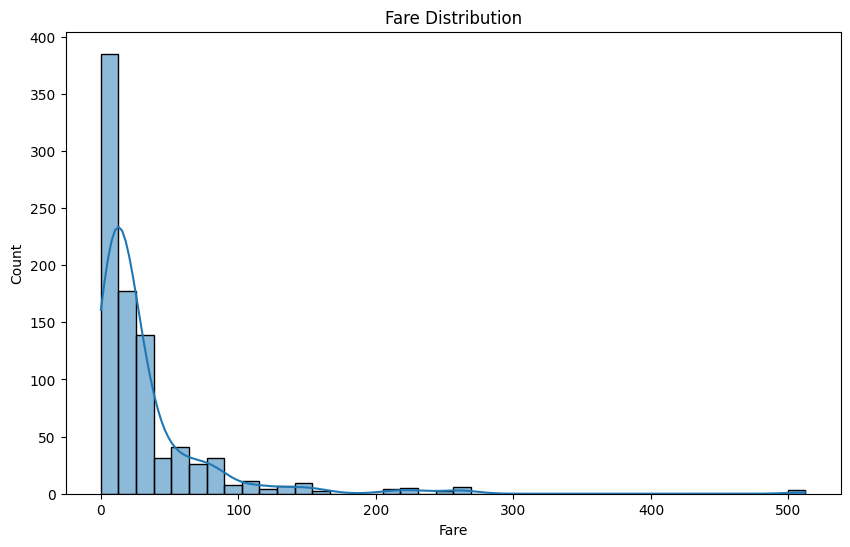

<ipython-input-293-125b50c0cd8d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Fare', data=df, palette='coolwarm')


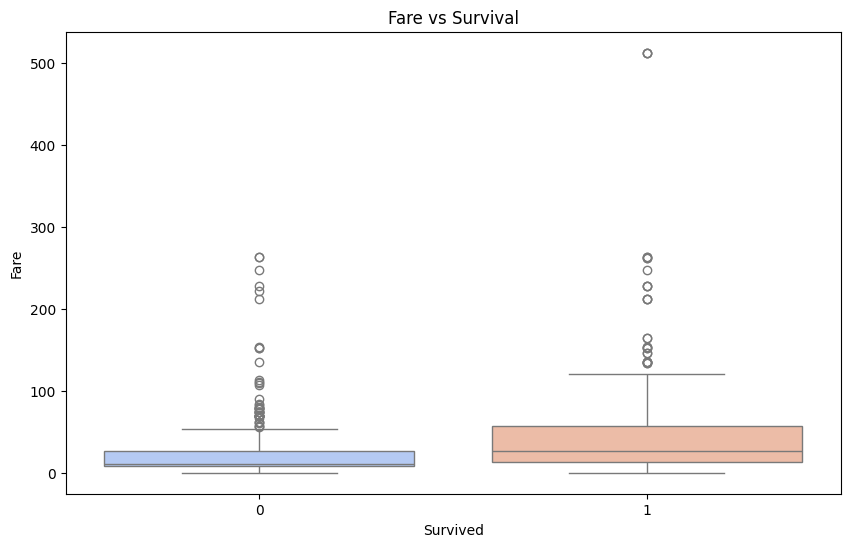

In [293]:
plt.figure(figsize=(10,6))
sns.histplot(df['Fare'], kde=True, bins=40)
plt.title('Fare Distribution')
plt.show()

# Fare vs Survival
plt.figure(figsize=(10,6))
sns.boxplot(x='Survived', y='Fare', data=df, palette='coolwarm')
plt.title('Fare vs Survival')
plt.show()



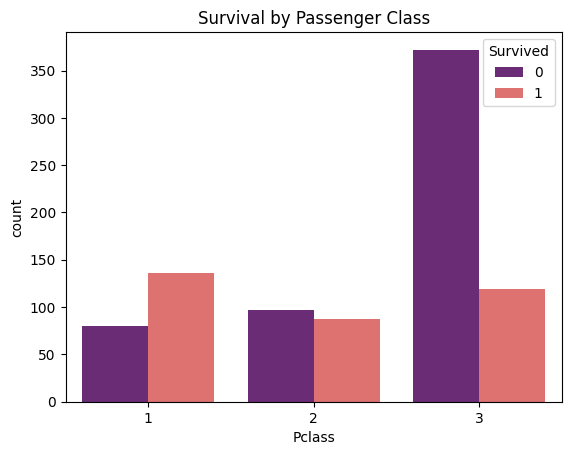

In [294]:
sns.countplot(x='Pclass', hue='Survived', data=df, palette='magma')
plt.title('Survival by Passenger Class')
plt.show()

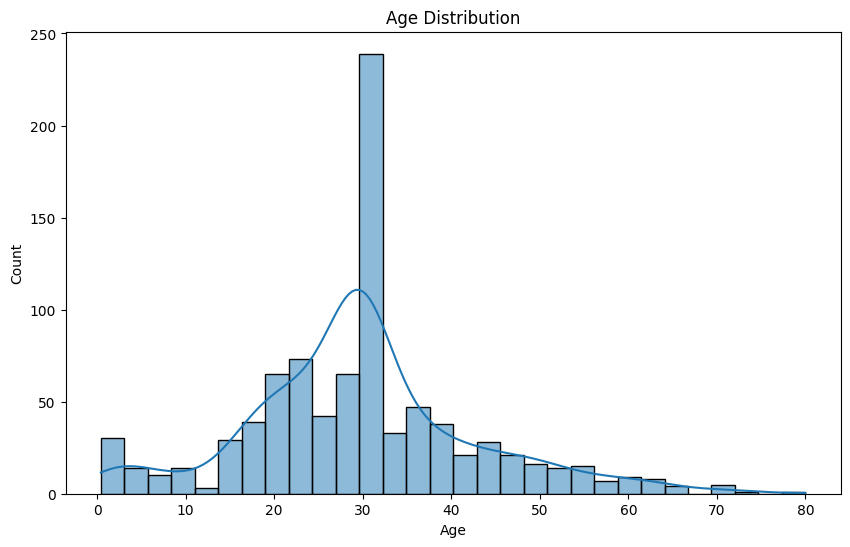

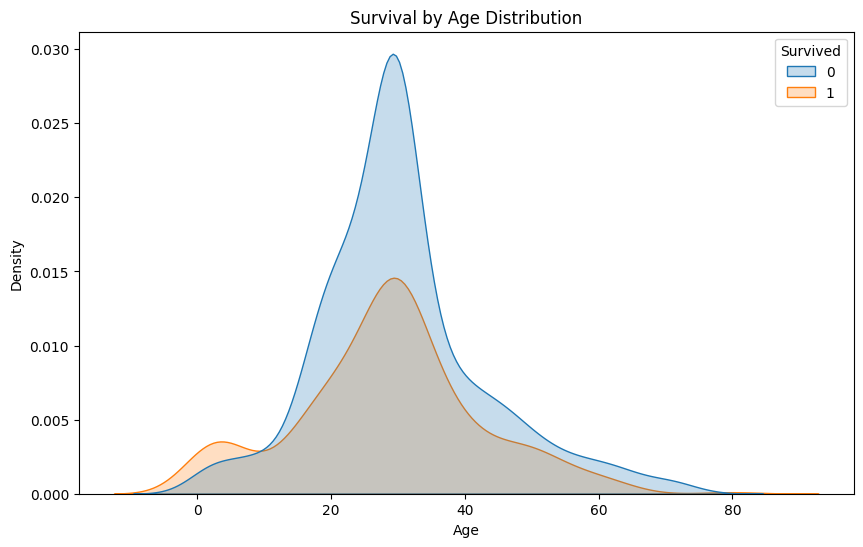

In [295]:
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

# Survival by Age
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='Age', hue='Survived', fill=True)
plt.title('Survival by Age Distribution')
plt.show()

<ipython-input-296-2c16de2fa017>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='viridis')


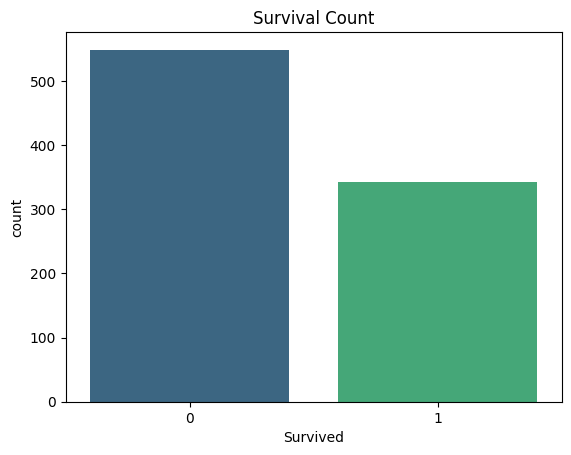

In [296]:
sns.countplot(x='Survived', data=df, palette='viridis')
plt.title('Survival Count')
plt.show()